# Logistic regression using tensorflow

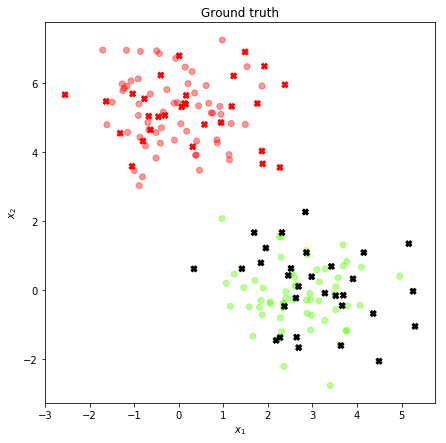

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
%matplotlib inline

np.random.seed(0)

from sklearn import datasets
n_samples = 120
n_test = 60
data, labels = datasets.make_blobs(n_samples=n_samples+n_test, n_features=2, centers=[(0,5),(3,0)], random_state=0)
labels = np.reshape(labels, (n_samples+n_test,1))
true_labels = labels

plt.figure(figsize=(7,7))
plt.scatter(data[0:120,0], data[0:120,1], c=labels[0:120], cmap=cm.prism, alpha=0.4)
plt.scatter(data[120:,0], data[120:,1], c=labels[120:], cmap=cm.flag, marker='X')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Ground truth')

#print data.shape
#print labels.shape

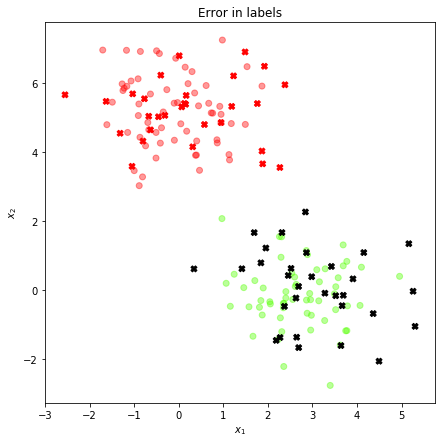

In [2]:
def flip_some_labels(labels, fraction):
    num_to_flip = int(len(labels) * fraction)
    indices = np.random.choice(len(labels), num_to_flip)
    for i in indices:
        if labels[i] == 0:
            labels[i] = 1
        else:
            labels[i] = 0
    return labels
        
labels = flip_some_labels(true_labels, 0.0)

plt.figure(figsize=(7,7))
plt.scatter(data[0:120,0], data[0:120,1], c=labels[0:120], cmap=cm.prism, alpha=0.4)
plt.scatter(data[120:,0], data[120:,1], c=labels[120:], cmap=cm.flag, marker='X')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Error in labels')

In [3]:
import tensorflow as tf

learning_rate = 0.00001
training_epochs = 10000
batch_size = 120
display_step = 100

X = tf.placeholder(tf.float32, [None, 2]) # Input x1, x2
Y = tf.placeholder(tf.float32, [None, 1]) # Output labels

W = tf.Variable(tf.truncated_normal([2,1]), name='weights') # w1, w2
b = tf.Variable(tf.truncated_normal([1]), name='bias')   # bias

def model(X, W, b):
    return tf.sigmoid(tf.matmul(X,W) + b)

y_model = model(X, W, b)
cost = tf.reduce_sum( -tf.log(y_model*Y + (1-y_model)*(1-Y)) ) 

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

predicted_class = tf.greater(y_model, 0.5)
correct = tf.equal(predicted_class, tf.cast(Y,'bool'))
accuracy = tf.reduce_mean( tf.cast(correct, 'float') )

In [4]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    overall_loss = 0.
    for i in range(0, n_samples, batch_size):
        batch_xs = data[i : min(i + batch_size, n_samples)]
        batch_ys = labels[i : min(i + batch_size, n_samples)]
        _, batch_loss = sess.run([train_op, cost], feed_dict={X:batch_xs, Y:batch_ys})
        overall_loss += (batch_loss / batch_size)
        
    if (epoch+1) % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "Loss=", "{:.9f}".format(overall_loss))

x_test = data[120:, :]
y_test = labels[120:]
a = sess.run([accuracy], feed_dict={X: x_test, Y: y_test})
print("Accuracy:", a)

W, b = sess.run([W, b])

('Epoch:', '0100', 'Loss=', '0.266853778')
('Epoch:', '0200', 'Loss=', '0.235509761')
('Epoch:', '0300', 'Loss=', '0.211157640')
('Epoch:', '0400', 'Loss=', '0.191665856')
('Epoch:', '0500', 'Loss=', '0.175701507')
('Epoch:', '0600', 'Loss=', '0.162383143')
('Epoch:', '0700', 'Loss=', '0.151102368')
('Epoch:', '0800', 'Loss=', '0.141424513')
('Epoch:', '0900', 'Loss=', '0.133030423')
('Epoch:', '1000', 'Loss=', '0.125680319')
('Epoch:', '1100', 'Loss=', '0.119190645')
('Epoch:', '1200', 'Loss=', '0.113418221')
('Epoch:', '1300', 'Loss=', '0.108250086')
('Epoch:', '1400', 'Loss=', '0.103595638')
('Epoch:', '1500', 'Loss=', '0.099381526')
('Epoch:', '1600', 'Loss=', '0.095547676')
('Epoch:', '1700', 'Loss=', '0.092044433')
('Epoch:', '1800', 'Loss=', '0.088830415')
('Epoch:', '1900', 'Loss=', '0.085870934')
('Epoch:', '2000', 'Loss=', '0.083136495')
('Epoch:', '2100', 'Loss=', '0.080602169')
('Epoch:', '2200', 'Loss=', '0.078246450')
('Epoch:', '2300', 'Loss=', '0.076050854')
('Epoch:', 

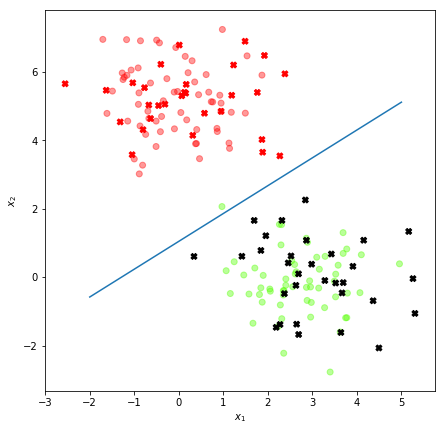

In [5]:
W = np.reshape(W,2)
x1 = np.linspace(-2,5,100)
y1 = - b/W[1] - W[0]*x1/W[1]
plt.figure(figsize=(7,7))
plt.plot(x1,y1,'-')
plt.scatter(data[0:120,0], data[0:120,1], c=labels[0:120], cmap=cm.prism, alpha=0.4)
plt.scatter(data[120:,0], data[120:,1], c=labels[120:], cmap=cm.flag, marker='X')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [6]:
import tfgraphviz as tfg
g = tfg.board(tf.get_default_graph())
g.view()

'G.gv.pdf'